# Statistics For Data Science Project


##  Question 1 Estimation


Packages:

In [1]:
import numpy as np
from scipy.stats import chi2
from scipy.stats import norm
import pandas as pd
from IPython.display import display, HTML
from IPython.display import IFrame
import matplotlib.pyplot as plt
import sklearn 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import time
np.random.seed(2070)

#### a)

Getting 50 samples for each p = [0.3,0.5,0.7]

In [2]:
np.random.seed(2070)
fifty_samples_03 = np.random.binomial(n=100,p=0.3,size=50)
fifty_samples_05 = np.random.binomial(n=100,p=0.5,size=50)
fifty_samples_07 = np.random.binomial(n=100,p=0.7,size=50) 
# example:
fifty_samples_05

array([53, 37, 56, 47, 58, 52, 54, 49, 51, 56, 58, 49, 51, 56, 51, 49, 36,
       52, 56, 48, 57, 51, 56, 48, 50, 49, 54, 43, 49, 49, 54, 52, 43, 43,
       44, 53, 44, 54, 46, 53, 51, 66, 52, 53, 57, 49, 43, 45, 41, 45])

###### * Normal Approximation 

Creating a normal approximation confidence interval, we will reuse some of these data later.
We also decided to keep track of the maximum likelihood estimator for the proportion p of the data, by getting the mean of the sample and then dividing it by 100. 


In [3]:
p_hat_03 = np.mean(fifty_samples_03/100) # This is our mle 
p_hat_05 = np.mean(fifty_samples_05/100) # this is our mle 
p_hat_07 = np.mean(fifty_samples_07/100) # this is our mle
mean_03 = np.mean(fifty_samples_03) # mean of data when p=0.3
mean_05 = np.mean(fifty_samples_05) # mean of data when p=0.5
mean_07 = np.mean(fifty_samples_07) # mean of data when p=0.7
sample_size = 50
" Getting the standard deviation devided by"
" the square root of the sample size, for the confidence interval"
std03 = np.std(fifty_samples_03) * 1/ np.sqrt(sample_size)
std05 = np.std(fifty_samples_03) * 1/ np.sqrt(sample_size)
std07 = np.std(fifty_samples_07) * 1/np.sqrt(sample_size)
z_95_conf = 1.96
normal_ci_for_03 = ((mean_03 -  std03* z_95_conf),(mean_03 + std03 * z_95_conf))
normal_ci_for_05 = ((mean_05 - std05 * z_95_conf),(mean_05 + std05* z_95_conf))
normal_ci_for_07 = ((mean_07 - std07 * z_95_conf),(mean_07 + std07 * z_95_conf))
# printing the p hats:
p_hat_03,p_hat_05,p_hat_07

(0.3076, 0.5025999999999999, 0.6975999999999999)

95% Normal Confidence intervals: 

Normal Confidence interval for when the p=0.3 is:

In [4]:
normal_ci_for_03

(29.433486827506037, 32.086513172493966)

Normal Confidence interval for when the p=0.5 is:

In [5]:
normal_ci_for_05

(48.93348682750604, 51.58651317249396)

Normal Confidence interval for when the p=0.7 is:

In [6]:
normal_ci_for_07

(68.38122950539258, 71.13877049460743)

###### * Parametric Bootstrap

For the parametric bootstrap, we sample from the DISTRIBUTION where we plug in our mle which we got from 
calculating from our dataset.
The idea here is that we have a data set, we calculate the mle for the parameter of our assumed model, and then we simulate
the data from the parametric model, using our mle.


Technically, all we have to do is sample 50 iid rvs from binonial distribution with n = 100 and p = "The appropriate MLE"

In the book we have found several ways to create a confidence interval using the bootstrap
we decided to the normal parametric bootstrap and also the percentile parametric bootstrap, just for fun.

* Starting with the normal parametric bootstrap confidence intervals.

In [7]:
np.random.seed(2070)
'this function takes in the assumed parameters for the binomial distribution'
'we assume that n=100 and the p parameter is according to our mle'
'finally the function also takes in the number of iterations for the bootstrap B this function returns the bootstrapped'
'variance'
def parametric_binomial_bootstrap(n,mle,B):
    T_boot = [] # note that we are trying to find the parameter p (proportion) of the data
    for i in range(B):
        current_draw = np.random.binomial(n=n,p=mle,size=50)
        T_boot.append(np.mean(current_draw))
    bootstrap_mean = np.sum(T_boot) / B
    new_tboot=(T_boot-bootstrap_mean) ** 2
    vboot = sum(new_tboot) / B 
    return vboot


parametric_vboot_for_03 = parametric_binomial_bootstrap(n=100,mle=p_hat_03,B=1000)
parametric_vboot_for_05 = parametric_binomial_bootstrap(n=100,mle=p_hat_05,B=1000)
parametric_vboot_for_07 = parametric_binomial_bootstrap(n=100,mle=p_hat_07,B=1000)
parametric_vboot_for_03,parametric_vboot_for_05,parametric_vboot_for_07

(0.42140636439999973, 0.4804305775999996, 0.4213616955999996)

In [8]:
parametric_ci_for_03 = (p_hat_03*100 - np.sqrt(parametric_vboot_for_03)*z_95_conf,p_hat_03*100 + np.sqrt(parametric_vboot_for_03) * z_95_conf)
parametric_ci_for_05 = (p_hat_05*100 - np.sqrt(parametric_vboot_for_05)*z_95_conf,p_hat_05*100 + np.sqrt(parametric_vboot_for_05) * z_95_conf)
parametric_ci_for_07 = (p_hat_07*100 - np.sqrt(parametric_vboot_for_07)*z_95_conf,p_hat_07*100 + np.sqrt(parametric_vboot_for_07) * z_95_conf)


Parametric bootstrap normal CI's:

Normal Parametric confidence interval when p=0.3

In [9]:
parametric_ci_for_03

(29.48764993438164, 32.03235006561835)

Normal Parametric confidence interval when p=0.5

In [10]:
parametric_ci_for_05

(48.901463247862544, 51.61853675213744)

Normal Parametric confidence interval when p=0.7

In [11]:
parametric_ci_for_07

(68.4877173703076, 71.03228262969238)

parametric_binomial_bootstrap_quantile

The main idea here is the same, we just use the percentile method instead:

In [12]:
def parametric_binomial_bootstrap_percentile(n,mle,B):
    T_boot = [] # note that we are trying to find the parameter p (proportion) of the data
    for i in range(B):
        current_draw = np.random.binomial(n=n,p=mle,size=50)
        T_boot.append(np.mean(current_draw))
    upper_bound=np.quantile(T_boot, .975)
    lower_bound = np.quantile(T_boot, .025)
    return (lower_bound,upper_bound)

quantile_ci_03=parametric_binomial_bootstrap_percentile(n=100,mle=p_hat_03,B=1000)
quantile_ci_05= parametric_binomial_bootstrap_percentile(n=100,mle=p_hat_05,B=1000)
quantile_ci_07=parametric_binomial_bootstrap_percentile(n=100,mle=p_hat_07,B=1000)

percentile confidence interval when p=0.3

In [13]:
quantile_ci_03

(29.599500000000003, 32.08)

percentile confidence interval when p=0.5

In [14]:
quantile_ci_05

(48.659499999999994, 51.6805)

percentile confidence interval when p=0.7

In [15]:
quantile_ci_07

(68.4995, 71.0205)

###### Comparing the two methods for the parametric confidence interval:

In [16]:
data = [
    ('Normal',parametric_ci_for_03,0.3),
    ('Normal',parametric_ci_for_05,0.5),
    ('Normal',parametric_ci_for_07,0.7),
    ('Percentile',quantile_ci_03,0.3),
    ('Percentile',quantile_ci_05,0.5),
    ('Percentile',quantile_ci_07,0.7)
]
df = pd.DataFrame(data,columns=['Method','95% Interval','p parameter value'])
display(HTML(df.to_html()))

,Method,95% Interval,p parameter value
0,Normal,"(29.48764993438164, 32.03235006561835)",0.3
1,Normal,"(48.901463247862544, 51.61853675213744)",0.5
2,Normal,"(68.4877173703076, 71.03228262969238)",0.7
3,Percentile,"(29.599500000000003, 32.08)",0.3
4,Percentile,"(48.659499999999994, 51.6805)",0.5
5,Percentile,"(68.4995, 71.0205)",0.7


###### * Non-parametric boostrap

For the non-parametric bootstrap we will get the vboot from re-drawing from our origin dataset, "fifty_samples_0x" with replacement.

This function takes in a data set to perform the non_parametric_bootstrap on and the B for the number of iterations.

In [17]:
np.random.seed(2070)
def non_parametric_bootstrap(data,B):
    T_boot = [] 
    data_size = len(data)
    for i in range(B):
        # This time we are drawing from our dataset, with replacement. 
        current_draw = np.random.choice(data, size=data_size, replace=True)
        T_boot.append(np.mean(current_draw))
    bootstrap_mean = np.sum(T_boot) / B
    new_tboot=(T_boot-bootstrap_mean) ** 2
    vboot = np.mean(new_tboot)
    return vboot   
# getting the variances:
non_param_vboot_for_03 = non_parametric_bootstrap(data=fifty_samples_03,B=1000)
non_param_vboot_for_05 = non_parametric_bootstrap(data=fifty_samples_05,B=1000)
non_param_vboot_for_07 = non_parametric_bootstrap(data=fifty_samples_07,B=1000)
# calculating the CI's
non_param_ci_for_03 = (mean_03 - np.sqrt(non_param_vboot_for_03)*z_95_conf,mean_03 + np.sqrt(non_param_vboot_for_03) * z_95_conf)
non_param_ci_for_05 = (mean_05 - np.sqrt(non_param_vboot_for_05)*z_95_conf,mean_05 + np.sqrt(non_param_vboot_for_05) * z_95_conf)
non_param_ci_for_07 = (mean_07 - np.sqrt(non_param_vboot_for_07)*z_95_conf,mean_07 + np.sqrt(non_param_vboot_for_07) * z_95_conf)

The non parametric bootstrap confidence interval for p=0.3:

In [18]:
non_param_ci_for_03


(29.398933596467007, 32.12106640353299)

The non parametric bootstrap confidence interval for p=0.5:

In [19]:
non_param_ci_for_05

(48.641058186339436, 51.87894181366056)

The non parametric bootstrap confidence interval for p=0.7:

In [20]:
non_param_ci_for_07

(68.3536474369238, 71.16635256307622)

Creating a table to compare the different confidence intervals, We will not take the percentile ci for this analysis:

In [21]:
data_q1a = [
    ('Normal Approximation',normal_ci_for_03,normal_ci_for_03[1]-normal_ci_for_03[0],0.3),
    ('Parametric Bootstrap',parametric_ci_for_03,parametric_ci_for_03[1]-parametric_ci_for_03[0],0.3),
    ('Non-parametric Bootstrap',non_param_ci_for_03,non_param_ci_for_03[1]-non_param_ci_for_03[0],0.3),
    ('Normal Approximation',normal_ci_for_05,normal_ci_for_05[1]-normal_ci_for_05[0],0.5),
    ('Parametric Bootstrap',parametric_ci_for_05,parametric_ci_for_05[1]-parametric_ci_for_05[0],0.5),
    ('Non-parametric Bootstrap',non_param_ci_for_05,non_param_ci_for_05[1]-non_param_ci_for_05[0],0.5),
    ('Normal Approximation',normal_ci_for_07,normal_ci_for_07[1]-normal_ci_for_07[0],0.7),
    ('Parametric Bootstrap',parametric_ci_for_07,parametric_ci_for_07[1]-parametric_ci_for_07[0],0.7),
    ('Non-parametric Bootstrap',non_param_ci_for_07,non_param_ci_for_07[1]-non_param_ci_for_07[0],0.7)
]
df_q1a = pd.DataFrame(data_q1a,columns=['Confidence Interval Type ','95% Interval','CI length','p parameter value'])
display(HTML(df_q1a.to_html()))

,Confidence Interval Type,95% Interval,CI length,p parameter value
0,Normal Approximation,"(29.433486827506037, 32.086513172493966)",2.653026,0.3
1,Parametric Bootstrap,"(29.48764993438164, 32.03235006561835)",2.544700,0.3
2,Non-parametric Bootstrap,"(29.398933596467007, 32.12106640353299)",2.722133,0.3
3,Normal Approximation,"(48.93348682750604, 51.58651317249396)",2.653026,0.5
4,Parametric Bootstrap,"(48.901463247862544, 51.61853675213744)",2.717074,0.5
5,Non-parametric Bootstrap,"(48.641058186339436, 51.87894181366056)",3.237884,0.5
6,Normal Approximation,"(68.38122950539258, 71.13877049460743)",2.757541,0.7
7,Parametric Bootstrap,"(68.4877173703076, 71.03228262969238)",2.544565,0.7
8,Non-parametric Bootstrap,"(68.3536474369238, 71.16635256307622)",2.812705,0.7


Notice that the CI length doesnt really change when using normal approximation
same with the parametric bootstrap
the outlier here is maybe the non-parametric bootstrap when p=0.5 but that is because the variance is bigger in this case.
all in all things that are actually affecting the length of the CI are the sample size and the variability in the given sample and the required alpha. A bigger sample size n makes the CI length smaller, greater variability in the sample produces a longer confidence interval-this might explain the non parametric bootstrap. Additionally, a bigger confidence level cause a longer confidence interval.

#### b)

The following function will take in the lambda parameter lam, and the number of averages to create.
It will create iterate num_averages times and generate every time a sample of size 50 from the poisson distribution with the given
lambda parameter inputted. the output of this function will be the averages of those samples.

In [22]:
np.random.seed(2070)
def create_poisson_averages(lam, num_averages):
    averages = []
    for i in range(num_averages):
        current_sample = np.random.poisson(lam=lam, size=50)
        averages.append(np.mean(current_sample))
    return averages

# creating 1000 poisson averages. each average was calculated from a sample size of 50 and a lambda parameter of 50.
poisson_avgs=create_poisson_averages(lam=50,num_averages=1000)

In [23]:
poisson_avgs[:10] # printing the first 10 poisson averages

[50.94, 49.96, 48.44, 52.04, 50.74, 50.9, 52.56, 50.08, 49.62, 47.84]

Coverage percentage should be easy, just calculate how many of the averages are inside the confidence interval.
Let's inspect all the p=0.5 confidence intervals we created in a.:
normal_ci_for_05
parametric_ci_for_05
non_param_ci_for_05

Let's remember our confidence intervals for p=0.5

In [24]:
print(normal_ci_for_05)
print(parametric_ci_for_05)
print(non_param_ci_for_05)

(48.93348682750604, 51.58651317249396)
(48.901463247862544, 51.61853675213744)
(48.641058186339436, 51.87894181366056)


The following function will take in an input_data - in our case it will take the 1000 poisson averages,
and a CI - confidence interval we created earlier.
the function will calculate how many averages fell into the confidence interval and will output the percentage.

In [25]:
def coverage_percentage(input_data, CI):
    total = len(input_data)
    work_data = input_data
    counter = 0
    work_data = np.array(input_data) 
    lower_bound = CI[0]
    upper_bound = CI[1]
    for i in range(len(work_data)):
        if lower_bound <= work_data[i] <= upper_bound:
            counter+=1
    coverage_percentage = counter / total
    return coverage_percentage


normal_coverage_percentage = coverage_percentage(input_data=poisson_avgs,CI=normal_ci_for_05)
parametric_coverage_percentage = coverage_percentage(input_data=poisson_avgs,CI=parametric_ci_for_05)
non_param_coverage_percentage = coverage_percentage(input_data=poisson_avgs,CI=non_param_ci_for_05)

The coverage percentages of the poisson data using the Binomial Confidence intervals is :

In [26]:
normal_coverage_percentage

0.787

In [27]:
parametric_coverage_percentage

0.793

In [28]:
non_param_coverage_percentage

0.865

The results are pretty good, we can see that a high percentage of averages actually fell into the binomial confidence intervals
despite coming from a poisson distribution.
We believe we got these nice results because there's this theorem which states that
if 

$X \sim bin(n,p) $

and

$\lambda = np$


then

$ l  i  m_{n\to\infty} P[X=x] = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}$

Note that in our case $n=100, p =0.5,\lambda =50$

In other words, as n gets bigger and bigger we can approximate binomial probabilities with poisson probabilities. So this, we believe, explains these pretty decent coverage percentages.

#### c) Repeating (1.a) with 50 i.i.d samples from Pois(50), and compare the confidence intervals
#### of (1.a) and (1.c)


mle of poisson is the sample average, so we will have to calculate it.
se of the poisson is sqrt(mle/n)
n=50.

In [29]:
np.random.seed(2070)
fifty_poisson_samples = np.random.poisson(lam=50,size=50)
poisson_mle = np.mean(fifty_poisson_samples)
print('The 50 i.i.d samples from pois(50) are  \n ', fifty_poisson_samples)
print('')
print('The MLE is',poisson_mle)

The 50 i.i.d samples from pois(50) are  
  [47 52 57 52 52 40 41 49 46 44 56 66 58 48 41 59 45 45 43 59 47 57 59 46
 51 58 48 44 46 53 54 47 60 53 54 48 50 54 49 51 52 55 41 56 45 44 60 54
 54 57]

The MLE is 50.94


* Normal Approximation Confidence interval

In [30]:
normal_pois_ci = (poisson_mle-z_95_conf*np.sqrt(poisson_mle/50), poisson_mle+z_95_conf*np.sqrt(poisson_mle/50))
normal_pois_ci

(48.96166178826773, 52.91833821173226)

* Parametric Confidence interval

In [31]:
np.random.seed(2070)
# same idea as the earlier question, just this time simulating from the poisson distribution.
def parametric_poisson_bootstrap(mle,B):
    T_boot = []
    for i in range(B):
        current_draw = np.random.poisson(lam=mle,size=50)
        T_boot.append(np.mean(current_draw))
    bootstrap_mean = np.sum(T_boot) / B
    new_tboot=(T_boot-bootstrap_mean) ** 2
    vboot = np.mean(new_tboot)
    return vboot
parametric_poisson_vboot = parametric_poisson_bootstrap(mle=poisson_mle,B=10000)

In [32]:
param_pois_ci=(poisson_mle - z_95_conf * np.sqrt(parametric_poisson_vboot), poisson_mle + z_95_conf * np.sqrt(parametric_poisson_vboot))

In [33]:
param_pois_ci

(48.96024737825761, 52.91975262174238)

* non parametric Confidence interval


In [34]:
poisson_non_param_vboot = non_parametric_bootstrap(data=fifty_poisson_samples,B=1000)

In [35]:
non_param_pois_ci = (poisson_mle - z_95_conf * np.sqrt(poisson_non_param_vboot), poisson_mle + z_95_conf * np.sqrt(poisson_non_param_vboot))

In [36]:
non_param_pois_ci

(49.2999645802898, 52.58003541971019)

* Table for Comparison of the CI's

In [37]:
data_q1c = [
    ('Binomial','Normal Approximation',normal_ci_for_03,normal_ci_for_03[1]-normal_ci_for_03[0],'n=100, p=0.3'),
    ('Binomial','Parametric Bootstrap',parametric_ci_for_03,parametric_ci_for_03[1]-parametric_ci_for_03[0],'n=100, p=0.3'),
    ('Binomial','Non-parametric Bootstrap',non_param_ci_for_03,non_param_ci_for_03[1]-non_param_ci_for_03[0],'n=100, p=0.3'),
    ('Binomial','Normal Approximation',normal_ci_for_05,normal_ci_for_05[1]-normal_ci_for_05[0],'n=100, p=0.5'),
    ('Binomial','Parametric Bootstrap',parametric_ci_for_05,parametric_ci_for_05[1]-parametric_ci_for_05[0],'n=100, p=0.5'),
    ('Binomial','Non-parametric Bootstrap',non_param_ci_for_05,non_param_ci_for_05[1]-non_param_ci_for_05[0],'n=100, p=0.5'),
    ('Binomial','Normal Approximation',normal_ci_for_07,normal_ci_for_07[1]-normal_ci_for_07[0],'n=100, p=0.7'),
    ('Binomial','Parametric Bootstrap',parametric_ci_for_07,parametric_ci_for_07[1]-parametric_ci_for_07[0],'n=100, p=0.7'),
    ('Binomial','Non-parametric Bootstrap',non_param_ci_for_07,non_param_ci_for_07[1]-non_param_ci_for_07[0],'n=100, p=0.7'),
    ('Poisson','Normal Approximation',normal_pois_ci,normal_pois_ci[1]-normal_pois_ci[0],'lambda=50'),
    ('Poisson','Parametric Bootstrap',param_pois_ci,param_pois_ci[1]-param_pois_ci[0],'lambda=50'),
    ('Poisson','Non-parametric Bootstrap',non_param_pois_ci,non_param_pois_ci[1]-non_param_pois_ci[0],'lambda=50')
]
df_q1c = pd.DataFrame(data_q1c,columns=['Distribution','Confidence Interval Type ','95% Interval','CI length','parameter values'])
display(HTML(df_q1c.to_html()))

,Distribution,Confidence Interval Type,95% Interval,CI length,parameter values
0,Binomial,Normal Approximation,"(29.433486827506037, 32.086513172493966)",2.653026,"n=100, p=0.3"
1,Binomial,Parametric Bootstrap,"(29.48764993438164, 32.03235006561835)",2.544700,"n=100, p=0.3"
2,Binomial,Non-parametric Bootstrap,"(29.398933596467007, 32.12106640353299)",2.722133,"n=100, p=0.3"
3,Binomial,Normal Approximation,"(48.93348682750604, 51.58651317249396)",2.653026,"n=100, p=0.5"
4,Binomial,Parametric Bootstrap,"(48.901463247862544, 51.61853675213744)",2.717074,"n=100, p=0.5"
5,Binomial,Non-parametric Bootstrap,"(48.641058186339436, 51.87894181366056)",3.237884,"n=100, p=0.5"
6,Binomial,Normal Approximation,"(68.38122950539258, 71.13877049460743)",2.757541,"n=100, p=0.7"
7,Binomial,Parametric Bootstrap,"(68.4877173703076, 71.03228262969238)",2.544565,"n=100, p=0.7"
8,Binomial,Non-parametric Bootstrap,"(68.3536474369238, 71.16635256307622)",2.812705,"n=100, p=0.7"
9,Poisson,Normal Approximation,"(48.96166178826773, 52.91833821173226)",3.956676,lambda=50


First of all we can see that the poisson CI length is the biggest in all three confidence interval types, 
the ci lengths are all above 3. While the binomial is above 3 just in the case where its a non-parametric bootstrap(which might also be a rare case which happened just because of our set.seed(2070) ), with a parameter value of p=0.5. for the poisson distribution we can see that the CI is always bigger then 3.


Second of all we can see that when the parameter value of the poisson is 50, the 95% confidence interval is very 
similar to the 95% confidence interval with binomial with parameters n=100 and p=0.5

In [38]:
data_q1c2 = [
    ('Binomial','Normal Approximation',normal_ci_for_05,normal_ci_for_05[1]-normal_ci_for_05[0],'n=100, p=0.5'),
    ('Binomial','Parametric Bootstrap',parametric_ci_for_05,parametric_ci_for_05[1]-parametric_ci_for_05[0],'n=100, p=0.5'),
    ('Binomial','Non-parametric Bootstrap',non_param_ci_for_05,non_param_ci_for_05[1]-non_param_ci_for_05[0],'n=100, p=0.5'),
    ('Poisson','Normal Approximation',normal_pois_ci,normal_pois_ci[1]-normal_pois_ci[0],'lambda=50'),
    ('Poisson','Parametric Bootstrap',param_pois_ci,param_pois_ci[1]-param_pois_ci[0],'lambda=50'),
    ('Poisson','Non-parametric Bootstrap',non_param_pois_ci,non_param_pois_ci[1]-non_param_pois_ci[0],'lambda=50')
]
df_q1c2 = pd.DataFrame(data_q1c2,columns=['Distribution','Confidence Interval Type ','95% Interval','CI length','parameter values'])
display(HTML(df_q1c2.to_html()))

,Distribution,Confidence Interval Type,95% Interval,CI length,parameter values
0,Binomial,Normal Approximation,"(48.93348682750604, 51.58651317249396)",2.653026,"n=100, p=0.5"
1,Binomial,Parametric Bootstrap,"(48.901463247862544, 51.61853675213744)",2.717074,"n=100, p=0.5"
2,Binomial,Non-parametric Bootstrap,"(48.641058186339436, 51.87894181366056)",3.237884,"n=100, p=0.5"
3,Poisson,Normal Approximation,"(48.96166178826773, 52.91833821173226)",3.956676,lambda=50
4,Poisson,Parametric Bootstrap,"(48.96024737825761, 52.91975262174238)",3.959505,lambda=50
5,Poisson,Non-parametric Bootstrap,"(49.2999645802898, 52.58003541971019)",3.280071,lambda=50


This makes sense because of the theorem we stated above, because under certain conditions, binomial distributions converge to Poisson distributions. So these distributions are very similar in a sense.

#### d)

$$
f(k) = (1 - p) ^ {k-1}p \qquad \qquad k=1,2,3,4,5\ldots \, .
$$


The geometric distribution models the number of trials that must be run in order to achieve success. It is therefore supported on the positive integers, k = 1, 2, ....

The probability mass function of the geometric distribution is

f(k) = (1 - p)^{k - 1} * p
where p is the probability of success of an individual trial.

We will model the number of frutis as follows:
    
suppose either adam or eve goes to a tree and shakes it, every time the tree is shaken a SINGLE(JUST ONE!) fruit will ALWAYS fall off (as long as there's actually fruits on the tree) and they count it as one of the fruits. They shake the tree until no fruits fall off. Just a single fruit can fall off the tree from one "shake".
the success in our geometric model is defined as the event when they shake the tree and no fruit falls off. In this world, if you shake a tree and no fruit falls off, it means that there are no fruits on the tree. This is like a "greedy algorithm" world.

We shall choose p=1/50
so the mean of the geometric distribution will be 50.


We will show numerically that this distribution will have a coverage percentage smaller than 95%. 

In [39]:
np.random.seed(2070)
# creating 1000 geometric averages from samples of size =50 with p=1/50 such that the E[x]=50
def create_geometric_averages(p, num_averages):
    averages = []
    for i in range(num_averages):
        current_sample = np.random.geometric(p=p, size=50)
        averages.append(np.mean(current_sample))
    return averages


geometric_avgs=create_geometric_averages(p=1/50,num_averages=1000)
geometric_avgs[:10] # printing the first 10 averages

[58.16, 44.92, 44.38, 45.74, 50.2, 49.84, 44.46, 46.36, 46.74, 43.4]

Now that we have the 1000 averages, we will use the coverage_percentage function to calculate the coverage percentage.
all we need to input to this function is the averages and the ci we want to test.

We will check the coverage percentages with the 1000 geometric averages and the poisson CIs.

In [40]:
norm_cov_per_geomData_poisCI = coverage_percentage(input_data=geometric_avgs, CI=normal_pois_ci)
parametric_cov_per_geomData_poisCI = coverage_percentage(input_data=geometric_avgs, CI=param_pois_ci)
non_parametric_cov_per_geomData_poisCI = coverage_percentage(input_data=geometric_avgs, CI=non_param_pois_ci)

Coverage percentage when using 1000 geometric averages as defined in the question and a normal approximation poisson CI

In [41]:
norm_cov_per_geomData_poisCI

0.215

Coverage percentage when using 1000 geometric averages as defined in the question and a parametric poisson CI

In [42]:
parametric_cov_per_geomData_poisCI

0.215

Coverage percentage when using 1000 geometric averages as defined in the question and a non parametric poisson CI

In [43]:
non_parametric_cov_per_geomData_poisCI

0.187

We can easily see that all the 3 CI provide a disappointing, under 95%, coverage percentage.
We choose the geometric distribution because we know from probability class that the geometric distribution converges essentially to the exponential distribution (in certain conditions) and not to the poisson. In other words, we know that geometric and poisson distributions are not really "related" in a sense.

$\blacksquare$

##  Question 2 Hypotheses Testing


#### a)

A non-parametric test to Eve to check whether Adam is cheating, i.e., whether the two samples are from the same distribution,
but not with the same expectation(with some confidence level 1 − α)
is the permutation test for testing H0 : FX = FY versus H1 : FX != FY.(X:=Eve,Y:=Adam)
T(x1,...,xm, y1,...,yn) is the test statistic: T(X1,...,Xm, Y1,...,Yn) = |mean(Xm) − mean(Yn)|   

Let N = m +n and consider forming all N! permutations of the data X1, ...,Xm, Y1, ..., Yn. 
For each permutation, compute the test statistic T. Usually, it is not practical to evaluate all N! permutations.
so We can approximate the p-value by sampling randomly from the set of permutations. The fraction of times Tj > tobs 
among these samples approximates the p-value.
Below is the calculation method of the algorithm for calculating the approximation to the p-value:

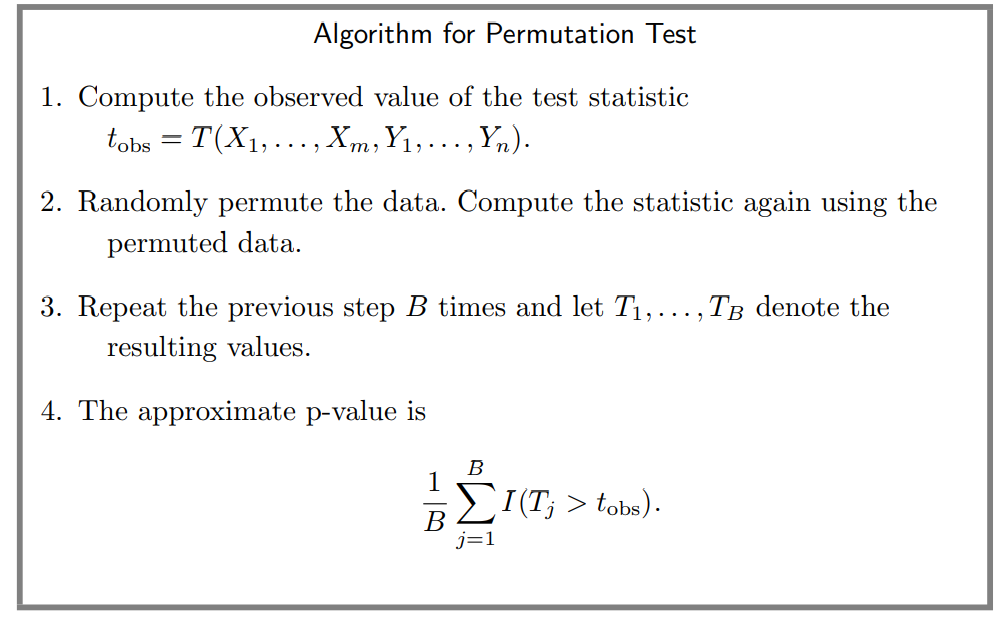

In [44]:
from IPython.display import Image
Image(r"Y:\52015\permutationtestpic.png", width=550, height=500)

Let our 
confidence level be $1 − α$



$\alpha\ = 0.05 $

reject the null hypothesis if the p value is smaller than alpha.

#### b)

###### (i) Adam is not cheating

For Adam's data, we will simulate 50 poisson iid random variables with lambda = 50, same for Eve.

In [45]:
np.random.seed(2070)
A_i = np.random.poisson(lam=50, size=50) # Adam's data
E = np.random.poisson(lam=50,size=50) # Eve's data, note that we will reuse this data set.
A_i[:10], E[:10]# printing the first 10 of adam and first 10 of eve.
t_obs_i =np.absolute(np.mean(A_i) - np.mean(E)) # our test statistic.
print("first 10 items of Adam's data set",A_i[:10])
print("")
print("Our test statistic is ",t_obs_i)

first 10 items of Adam's data set [47 52 57 52 52 40 41 49 46 44]

Our test statistic is  0.9799999999999969


Creating a permutation test function which will perform the permutation test, with the test statistic being the one we created above


The following function takes in Adam's data, Eve's data, B = the number of statistics we want to create, and a confidence_level.
the function will perform extactly what we showed in Q2-a).
we will permute the inputted data B times and calculate the test statistic.
Our p_value for the permutation test will be the number of permutation statistics which were greater than the original
observed statistic, divided by the total number of statistics we created from permuting the data (B).
the function will perform the calculations and tell us if we reject the null, or if we fail to reject the null.

In [46]:
def permutation_test(Adam,Eve,B,confidence_level):
    alpha = np.round(1 - confidence_level,5)
    t_obs = np.absolute(np.mean(Adam) - np.mean(Eve)) # Compute the observed value of the test statistic t_obs
    full_data = np.concatenate((Adam,Eve))
    statistics = [] # hold the statistics 
    # computing the B statistics by permuting the data
    for i in range(B):
        permuted_data = np.random.permutation(full_data).reshape(2,50) # permuting the full data, and then reshaping it to X and Y
        X = permuted_data[0]
        Y = permuted_data[1]
        current_statistic = np.absolute(np.mean(X) - np.mean(Y))
        statistics.append(current_statistic)
    # computing the approximate p value:
    counter = 0 # counting how many permutation statistics are greater than the original, observed statistic t_obs
    for s in range(len(statistics)):
        if statistics[s] > t_obs:
            counter+=1
    p_value= counter/B
    print("The P value is:",p_value,"  t obs:",t_obs,"  Alpha:",alpha)
    if (p_value < alpha):
        print("Reject the Null")
    else:
        print("Failed To Reject the Null")
        

Remember, we are testing the following:

$ H_0 : F_A = F_E$

vs.

$ H_1 : F_A \neq F_E $

where
$ F_A $ is Adam's sample and $F_E$ is Eve's sample

In [47]:
np.random.seed(2070)
permutation_test(Adam=A_i,Eve=E,B=10000,confidence_level=0.95)

The P value is: 0.4419   t obs: 0.9799999999999969   Alpha: 0.05
Failed To Reject the Null


Our permutation test with a confidence level of 95% failed to reject the null.
In other words, it is safe to say that Adam is not Cheating, with a 95% confidence.

###### (ii) Adam is adding a constant number 5 to each count


In [48]:
###### (ii) Adam is adding a constant number 5 to each count
np.random.seed(2070)
A_ii = np.random.poisson(lam=50, size=50) +5  # Adam's data but this time he is adding a constant number 5 to each count
t_obs_ii = np.absolute(np.mean(A_ii) - np.mean(E))
A_ii[:10], t_obs_ii
np.random.seed(2070)
permutation_test(Adam=A_ii,Eve=E,B=10000,confidence_level=0.95)

The P value is: 0.0   t obs: 5.979999999999997   Alpha: 0.05
Reject the Null


Our permutation test Reject's the null.
In other words, we can say with a 95% confidence that adam is cheating.

###### (iii) Adam is sampling another independent Pois(5) after he counts each tree, and he adds it to the count of the tree

In [49]:
# adam is sampling another independent pois(5) after he counts each tree and he adds it to the count of the tree
A_pois50 = np.random.poisson(lam=50, size=50)
A_pois5 = np.random.poisson(lam=5,size=50)
# adds them up
A_iii = A_pois50 + A_pois5
np.random.seed(2070)
permutation_test(Adam=A_iii,Eve=E,B=10000,confidence_level=0.95)

The P value is: 0.0018   t obs: 4.759999999999998   Alpha: 0.05
Reject the Null


Our permutation test rejects the null.
In other words, we can say with a 95% confidence that adam is indeed cheating.

#### c)

Note that if Adam is cheating according to (iii), and if the apples have a P ois(50) distribution, then Adam is actually sampling from P ois(55) distribution. Suggest two parametric
tests to determine whether Adam is cheating or not in this case (i.e., H0 : λ = 50, H1 :
λ = 55) with confidence level 95%. Show with simulations that you indeed obtained the
desired confidence level.

#### We want to test 
 $ H_0 : \lambda = 50$ vs $ H_1 : \lambda = 55 $

###### * Likelihood Ratio Test:

The first parametric test we suggest is the likelihood ratio test.

With some algebra we get that the maximum likelihood estimator is

$ \lambda_1= \hat{\lambda_{mle}} =\bar{x} $ 

And so our statistic will be

$S(X)=2 *[ (\sum_{i=1}^{n} x_i) * \log{(\lambda_1 / \lambda_0)} - n*\lambda_1 + n*\lambda_0] $

Note that $dim(\theta)=1$ and $dim(\theta_{0})=0$ so we will 
approximate the p_value using the $\chi^{2}_{1}$ distribution.

The likelihood_ratio_test function:
h_0 takes in the lambda parameter under h_0, in our case it will be 50. 
B will be the times we run this simulation.
confidence_level is the confidence level we want for the test
size is the sample size we want to generate every run of the simulation.


What this function does is take in all of these parameters and runs B times:
every time it will simulate 50 poisson(55) values and calculate the current mle and the current sum of x's.
it will then calculate our statistic S(X) for the current sample and save it.
then we will use the chi squared distribution with 1 degree of freedom to get an approximate p value.
the function the returns the number of good p values divided by the number of simulations B.
Important: The "Good p values" are the p values which are less than or equal to our significance level alpha. In other words, the function returns the simulated confidence level.

In [50]:
np.random.seed(2070)
def likelihood_ratio_test(h_0,B,confidence_level,size):
    alpha=1-confidence_level
    test_statistics=[]
    p_values=[]
    good_p_values =0
    for t in range(B):
        current_data = np.random.poisson(lam=55, size=size)
        current_mle = np.mean(current_data)
        current_sum = np.sum(current_data)
        current_test_statistic = 2 * ( current_sum * np.log(current_mle/h_0) - size*current_mle + size*h_0)
        test_statistics.append(current_test_statistic)
        current_p_value = chi2.sf(current_test_statistic, df=1)
        p_values.append(current_p_value)
        if current_p_value <= alpha:
            good_p_values+=1
    return good_p_values/B

likelihood_ratio_test(h_0=50,B=1000,confidence_level=0.95,size=50)

0.996

so our simulated confidence level is pretty close to our original input 95%. it makes sense because of computational round-ups etc.


###### let's see how the simulated confidence changes as we get closer to the real lambda value of 55:



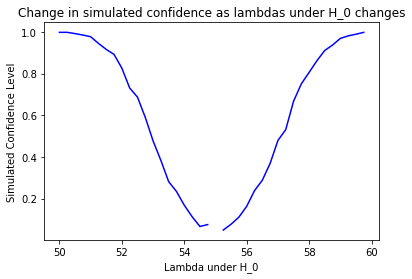

In [51]:
simulated_conf_likelihood_ratio_test=[]
lambdas_lrt = np.arange (start=50, stop=60, step=0.25)
for j in range(len(lambdas_lrt)):
    if lambdas_lrt[j]==55:
        simulated_conf_likelihood_ratio_test.append(np.nan)
    else:
        simulated_conf_likelihood_ratio_test.append(likelihood_ratio_test(h_0=lambdas_lrt[j],B=1000,confidence_level=0.95,size=50))
def quick_plot(Xs, Ys,x_text='',y_text=''):
    plt.plot(Xs,Ys, color='blue')
    title = 'Change in simulated confidence as lambdas under H_0 changes'
    plt.title(title)
    plt.xlabel(x_text)
    plt.ylabel(y_text)
    plt.show()
    return None

quick_plot(Xs=lambdas_lrt,Ys=simulated_conf_likelihood_ratio_test,x_text='Lambda under H_0',y_text='Simulated Confidence Level')    

Note how our simulated confidence decreases as the lambdas under H_0 gets closer to 55.
In other words, we fail to reject the null,H_0, the more lambda under H_0 gets closer to the "real value of lambda" which is 55.
Note that we did not test h_0=55 vs h_1=55 because it simply doesn't make sense. That's why there's a hole in the graph around that area.
remember, a low simulated confidence level means that a lot of the pvalues at every iteration were bigger than alpha.

###### * Wald Test:

For the second test we will use the Wald test.
We will have to reframe the original hypothesis test above into a wald-like hypothesis test.

We suggest the following hypothesis test framework:


$ \delta :=$  the difference between the means of Adam's and Eve's data

$ H_0 : \delta = 0$ 
vs 
$ H_1 : \delta \neq  0$

with a wald statistic of 

$ W = |\dfrac{\hat{\delta} - 0}{\hat{se}}| =|\dfrac{{\bar{X} } - \bar{Y}}{\sqrt{Var[Adam]/n + Var[Eve]/n}}| $

Just for the sake of completeness, 
let $\bar{X}$ be Adam's sample mean
and let $\bar{Y}$ be Eve's sample mean.

Where $Var[Adam]$ is the variance of Adam's sample and $Var[Eve]$ is the variance of eve's sample
and n is the sample size, we assume they both have equal sample sizes of 50.
And so we will approximate the p value using the standard normal distribution.


failing to reject the null will mean that adam is cheating.

The following function is very similar to the likelihood ratio test function aboove, the difference here is that we are calculating the wald test statistic instead of the LRT statistic and using the normal distribution to approximate the p value.
Additionally, we are simulating Adam's and Eve's data every iteration B.

In [52]:
np.random.seed(2070)
def wald_test(Adam_lambda,Eve_lambda,B,confidence_level,size):
    alpha = 1-confidence_level
    test_statistics=[]
    p_values=[]
    critical_values=[]
    good_p_values =0
    for t in range(B):
        A = np.random.poisson(lam=Adam_lambda, size=size)
        A_mean = np.mean(A)
        A_var = np.var(A) /size
        E = np.random.poisson(lam=Eve_lambda,size=size)
        E_mean = np.mean(E)
        E_var = np.var(E) / size
        numerator = A_mean - E_mean
        denominator = np.sqrt(A_var+E_var)
        wald_statistic = np.abs(numerator / denominator)
        current_p_value = 2*norm.cdf(-wald_statistic) # normal approx.
        test_statistics.append(wald_statistic)
        p_values.append(current_p_value)
        if current_p_value <= alpha:
            good_p_values+=1
    return good_p_values/B

wald_test(Adam_lambda=55,Eve_lambda=50,B=100,confidence_level=0.95,size=50)

0.95

This time the simulated confidence is exactly the confidence level!!!!!!!!


#### d)

We decided to perform the calculation analytically, specifically for the likelihood ratio test.
We came to the conclusion that the minimal sample size is n=22.
It is in the Pdf.
We attached the pdf below, but it is also provided in the zip file.


Note: we use the normal approximation to find n.

In [53]:
IFrame("question2d.pdf", width=900, height=1000)

$\blacksquare$

##  Question 3 Statistical Models

In [54]:
df = pd.read_csv(r"Y:\Downloads\AppleTrees.csv")
df

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24
0,107,102.886643,196.943843,297.906121,52,22,32.859792,164,106,63.507651,...,125.475051,0,1,0,154.783184,147.622883,244.667677,0.369351,0.500646,1.475186
1,90,100.815798,194.741136,300.260251,49,19,17.459270,161,96,70.442053,...,88.476607,0,1,0,50.996887,84.631845,113.862044,0.637361,0.511120,0.640851
2,90,105.404634,199.422587,301.454232,46,13,26.533067,150,98,99.324123,...,113.794568,1,1,1,24.581021,43.355957,80.561859,0.557686,0.522909,-0.015851
3,92,109.501591,206.921739,317.415536,41,13,26.516413,152,109,96.347172,...,93.474055,1,1,1,54.475980,134.528252,212.358502,0.416433,0.510081,0.465479
4,99,93.237287,195.307733,286.121573,48,13,23.520136,136,93,61.732369,...,115.317433,1,1,0,34.491754,331.263536,87.449725,0.723308,0.514442,1.992274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,87,115.244387,206.882533,317.737184,46,15,33.859331,135,92,60.165328,...,83.004716,1,1,0,66.720630,15.341354,36.034768,0.697481,0.464417,1.022261
496,94,109.368480,209.701398,312.298447,57,14,34.307389,162,107,42.863637,...,104.214001,1,1,1,3.282683,103.106200,185.642747,0.488762,0.452391,1.571689
497,87,101.890753,200.493877,314.773357,47,20,24.782499,143,92,84.975155,...,110.268455,0,0,0,41.305439,5.958082,16.891214,0.401594,0.521874,-0.226588
498,92,104.241466,208.121770,320.094890,48,18,27.573344,148,99,72.869405,...,82.487577,0,0,0,38.607683,113.665653,21.334809,0.486954,0.516862,0.578888


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       500 non-null    int64  
 1   x1      500 non-null    float64
 2   x2      500 non-null    float64
 3   x3      500 non-null    float64
 4   x4      500 non-null    int64  
 5   x5      500 non-null    int64  
 6   x6      500 non-null    float64
 7   x7      500 non-null    int64  
 8   x8      500 non-null    int64  
 9   x9      500 non-null    float64
 10  x10     500 non-null    float64
 11  x11     500 non-null    float64
 12  x12     500 non-null    float64
 13  x13     500 non-null    float64
 14  x14     500 non-null    float64
 15  x15     500 non-null    float64
 16  x16     500 non-null    int64  
 17  x17     500 non-null    int64  
 18  x18     500 non-null    int64  
 19  x19     500 non-null    float64
 20  x20     500 non-null    float64
 21  x21     500 non-null    float64
 22  x2

#### a)

In [56]:
# Split your data randomly to train (80%) and test (20%) sets
y = df['y']
X = df.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
#add constant variable(B0) variable to predictor variables
X_train2 = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train,X_train2).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.98
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           3.60e-82
Time:                        09:50:32   Log-Likelihood:                -1200.3
No. Observations:                 400   AIC:                             2451.
Df Residuals:                     375   BIC:                             2550.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9885      9.877     -0.910      0.3

C:\Users\yoel1\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [58]:
#add constant variable(B0) variable to predictor variables
X_test2 = sm.add_constant(X_test)
y_predicted = model.predict(X_test2)

C:\Users\yoel1\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [59]:
# SSE (sum of squared errors) of the test set
sse_test=sum((y_predicted.values-y_test.values)**2)
sse_test

3005.586228431539

In [60]:
# SSE (sum of squared errors) of the training set
y_predicted_Train = model.predict(X_train2)
sse_train=sum((y_predicted_Train.values-y_train.values)**2)
sse_train

9461.587217569995

In [61]:
print("The SSE of the trining data is:", sse_train,"and", "the SSE of the trining data is:",sse_test )

The SSE of the trining data is: 9461.587217569995 and the SSE of the trining data is: 3005.586228431539


### extras (You don't have to check this, we just wanted to test some stuff)

In [62]:
from sklearn.metrics import mean_squared_error

MSE_Train = mean_squared_error(y_train.values, y_predicted_Train.values)
MSE_Test = mean_squared_error(y_test.values, y_predicted.values)
print("The MSE of the trining data is:", MSE_Train,"and", "the MSE of the trining data is:",MSE_Test )

The MSE of the trining data is: 23.653968043925005 and the MSE of the trining data is: 30.05586228431538


In [63]:
abs(np.sqrt(np.mean(np.square(((y_train.values - y_predicted_Train.values) / y_train.values)), axis=0))-1)

0.9471313107310471

In [64]:
abs(np.sqrt(np.mean(np.square(((y_test.values - y_predicted.values) / y_test.values)), axis=0))-1)

0.940259479616586

#### b)

The two different methods to find a subset of covariates that are the most important for the prediction task is AIC and BIC.

If there are k covariates then there are 2^k possible models. We need to search through all these models,
assign a score to each one, and choose the model with the best score. When k is large,this is infeasible.
In that case we need to search over a subset of all the models.
Two common methods are forward and backward stepwise regression, Both are greedy searches.
In forward stepwise regression, we start with no covariates in the model. We then add the one variable that leads to the best score. We continue adding variables one at a time until the score does not improve. We chose the forward stepwise regression.

1) The formula for calculating AIC is:
AIC = 2K – 2ln(L), Therefore, we will look for the model whose result minimizes the AIC the most.

In [65]:
def processSubset_AIC(X):
    # Fit model on feature_set and calculate AIC
    new_X_train = X_train2[X_train2.columns[X_train2.columns.isin(X)]]
    model_AIC = sm.OLS(y_train,new_X_train).fit()
    AIC = model_AIC.aic
    return {"explanatory_variables":new_X_train.columns, "AIC":AIC}

In [66]:
start = time.time()

X_Train_Final= ["const"]
X_train_Helper = X_train.copy()
results = []
# The forward stepwise regression algorithm (greedy search algorithm) with AIC method
while len(X_train_Helper.columns)>0:
    for i in X_train_Helper.columns:
        results.append(processSubset_AIC(X_Train_Final+[i]))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    best_model = models.loc[models['AIC'].argmin()]
    X_Train_Final = best_model.explanatory_variables.tolist()
    X_train_Helper = X_train_Helper[X_train_Helper.columns[~X_train_Helper.columns.isin(X_Train_Final)]]
    if min(models["AIC"])==models["AIC"][0]:
        AIC_best_model=best_model
        break
    results = [results[models.index[models.AIC==best_model.AIC].tolist()[0]]].copy()

    
end = time.time()
print("time in seconds", (end-start))

time in seconds 0.3824343681335449


In [67]:
AIC_best_model.explanatory_variables

Index(['const', 'x3', 'x4', 'x6', 'x7', 'x8', 'x11', 'x18', 'x19', 'x20',
       'x24'],
      dtype='object')

In [68]:
AIC_best_model.AIC

2434.4596285649895

In [69]:
X_train2_AIC = X_train2[X_train2.columns[X_train2.columns.isin(AIC_best_model.explanatory_variables)]]
X_test2_AIC = X_test2[X_test2.columns[X_test2.columns.isin(AIC_best_model.explanatory_variables)]]
# fit linear regression model with a subset of covariates that are the most important for the prediction task,
# which were selected according to the AIC method
model_AIC = sm.OLS(y_train,X_train2_AIC).fit()

y_predicted_AIC = model_AIC.predict(X_test2_AIC)

# SSE (sum of squared errors) of the test set
sse_test_AIC=sum((y_predicted_AIC.values-y_test.values)**2)

# SSE (sum of squared errors) of the training set
y_predicted_Train_AIC = model_AIC.predict(X_train2_AIC)
sse_train_AIC=sum((y_predicted_Train_AIC.values-y_train.values)**2)


2) The formula for calculating BIC is:

BIC=(RSS+log(n)dσ̂2) / n
where:

d: The number of predictors
n: Total observations
σ̂: Estimate of the variance of the error associate with each response measurement in a regression model
RSS: Residual sum of squares of the regression model (RSS=SSE)
Therefore, we will look for the model whose result minimizes the BIC the most 

In [70]:
def processSubset_BIC(X):
    # Fit model on feature_set and calculate BIC
    new_X_train = X_train2[X_train2.columns[X_train2.columns.isin(X)]]
    model_BIC = sm.OLS(y_train,new_X_train).fit()
    BIC = model_BIC.bic
    return {"explanatory_variables":new_X_train.columns, "BIC":BIC}

In [71]:
start = time.time()

X_Train_Final= ["const"]
X_train_Helper = X_train.copy()
results = []

# The forward stepwise regression algorithm (greedy search algorithm) with BIC method
while len(X_train_Helper.columns)>0:
    for i in X_train_Helper.columns:
        results.append(processSubset_BIC(X_Train_Final+[i]))
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    best_model = models.loc[models['BIC'].argmin()]
    X_Train_Final = best_model.explanatory_variables.tolist()
    X_train_Helper = X_train_Helper[X_train_Helper.columns[~X_train_Helper.columns.isin(X_Train_Final)]]
    if min(models["BIC"])==models["BIC"][0]:
        BIC_best_model=best_model
        break
    results = [results[models.index[models.BIC==best_model.BIC].tolist()[0]]].copy()
    
end = time.time()
print("time in seconds", (end-start))

time in seconds 0.21510839462280273


In [72]:
BIC_best_model.explanatory_variables

Index(['const', 'x3', 'x6', 'x7', 'x11', 'x19', 'x20', 'x24'], dtype='object')

In [73]:
BIC_best_model.BIC

2471.0900418190495

In [74]:
X_train2_BIC = X_train2[X_train2.columns[X_train2.columns.isin(BIC_best_model.explanatory_variables)]]
X_test2_BIC = X_test2[X_test2.columns[X_test2.columns.isin(BIC_best_model.explanatory_variables)]]
# fit linear regression model with a subset of covariates that are the most important for the prediction task,
# which were selected according to the BIC method
model_BIC = sm.OLS(y_train,X_train2_BIC).fit()

y_predicted_BIC = model_BIC.predict(X_test2_BIC)

# SSE (sum of squared errors) of the test set
sse_test_BIC=sum((y_predicted_BIC.values-y_test.values)**2)

# SSE (sum of squared errors) of the training set
y_predicted_Train_BIC = model_BIC.predict(X_train2_BIC)
sse_train_BIC=sum((y_predicted_Train_BIC.values-y_train.values)**2)

In [75]:
print("sse_train:",sse_train,"sse_train_AIC:",sse_train_AIC,"sse_train_BIC:",sse_train_BIC)
print("sse_test:",sse_test,"sse_test_AIC:",sse_test_AIC,"sse_test_BIC:",sse_test_BIC)

sse_train: 9461.587217569995 sse_train_AIC: 9747.211782912975 sse_train_BIC: 10011.435757125415
sse_test: 3005.586228431539 sse_test_AIC: 2939.197432663357 sse_test_BIC: 2859.066328217759


the SSE scores increased for the training data with a subset of variables selected by the two methods, but decreased for the test data. Because they studied the training data rather than imitated it.
the full model with all the variables did not learn the pattern, but rather memorized the training data(overfitting). Therefore, the full model has the highest SSE score for test data and the lowest SSE score for training data.

#### c)

Eve argued that the most important (for the prediction) covariates are also the most significant ones (i.e., with the smallest P.value).
We disagree with Eve and we use the data to support our claim:

In [76]:
#view the summary of the full model with all the variables
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.98
Date:                Fri, 10 Feb 2023   Prob (F-statistic):           3.60e-82
Time:                        09:50:33   Log-Likelihood:                -1200.3
No. Observations:                 400   AIC:                             2451.
Df Residuals:                     375   BIC:                             2550.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.9885      9.877     -0.910      0.3

The “t” is the Wald test statistic for testing H0 : βj = 0 versus H1 : βj != 0
and the "P>|t|" gives the p-value: the probability of the estimated β coefficient
being as large as it is if there was no real relationship between consumption and the corresponding predictor.

#### We will fit a linear model where the variables are the significant (p-value<0.05) variables from the model with all the variables.

In [77]:
d = {}
for i in X.columns.tolist():
    d[f'{i}'] = model.pvalues[i]

df_Pvalue= pd.DataFrame(d.items(), columns=['variables', 'p_value']).sort_values(by = 'p_value',ascending=False).reset_index(drop=True)
Eve_variables=df_Pvalue[df_Pvalue.p_value<0.05].copy()
Eve_variables

,variables,p_value
16,x7,2.255354e-02
17,x8,7.237644e-03
18,x11,1.252979e-05
19,x24,2.937274e-07
20,x3,3.625078e-08
21,x6,1.531731e-10
22,x19,7.680936e-21
23,x20,2.361086e-66


In [78]:
X_train2_Eve = X_train2[X_train2.columns[X_train2.columns.isin(Eve_variables.variables)]]
X_test2_Eve = X_test2[X_test2.columns[X_test2.columns.isin(Eve_variables.variables)]]
#fit linear regression model
model_Eve = sm.OLS(y_train,X_train2_Eve).fit()

y_predicted_Eve = model_Eve.predict(X_test2_Eve)

# SSE (sum of squared errors) of the test set
sse_test_Eve=sum((y_predicted_Eve.values-y_test.values)**2)

# SSE (sum of squared errors) of the training set
y_predicted_Train_Eve = model_Eve.predict(X_train2_Eve)
sse_train_Eve=sum((y_predicted_Train_Eve.values-y_train.values)**2)

In [79]:
print("sse_train_Eve:",sse_train_Eve,"sse_train_AIC:",sse_train_AIC,"sse_train_BIC:",sse_train_BIC)
print("sse_test_Eve:",sse_test_Eve,"sse_test_AIC:",sse_test_AIC,"sse_test_BIC:",sse_test_BIC)

sse_train_Eve: 9886.749605322675 sse_train_AIC: 9747.211782912975 sse_train_BIC: 10011.435757125415
sse_test_Eve: 2889.4577000711392 sse_test_AIC: 2939.197432663357 sse_test_BIC: 2859.066328217759


In [80]:
Eve_variables.variables.tolist()

['x7', 'x8', 'x11', 'x24', 'x3', 'x6', 'x19', 'x20']

In [81]:
BIC_best_model.explanatory_variables

Index(['const', 'x3', 'x6', 'x7', 'x11', 'x19', 'x20', 'x24'], dtype='object')

In [82]:
AIC_best_model.explanatory_variables

Index(['const', 'x3', 'x4', 'x6', 'x7', 'x8', 'x11', 'x18', 'x19', 'x20',
       'x24'],
      dtype='object')

Eve argued that the most important (for the prediction) covariates are also the most significant ones (i.e., with the smallest P.value).
We disagree with Eve. If what Eve stated was true, we would expect the sse of her model to be lower (or equal to) than the sse of the AIC / BIC models. In our case, we can see that the BIC model has the lowest sse in the test data ( when compared to the other two) and it does not have the variable x8, which is in Eve's model because was found to be significant (in the full, naive model). In other words, Eve is not necesarrily right because the BIC model had better (lower) sse on the test data, despite not having all the significant variables(x8). 

#### d)

In the OLS Regression Results "P>|t|" gives the p-value: the probability of the estimated β coefficient
being as large as it is if there was no real relationship between consumption and the corresponding predictor.
and this is the Hypothesis we examined in this section.

In [83]:
d = {}
for i in X.columns.tolist():
    d[f'{i}'] = model.pvalues[i]

df_Pvalue= pd.DataFrame(d.items(), columns=['variables', 'p_value']).sort_values(by = 'p_value',ascending=False).reset_index(drop=True)
df_Pvalue

,variables,p_value
0,x13,9.250727e-01
1,x21,9.018349e-01
2,x22,7.629170e-01
3,x9,7.438709e-01
4,x16,7.049079e-01
5,x2,4.407691e-01
6,x15,3.185934e-01
7,x17,2.523230e-01
8,x23,2.513459e-01
9,x5,2.434780e-01


In [84]:
a = 0.05
m = df_Pvalue.variables.nunique()
df_Pvalue["Bonferroni_Method"] = ""
for i in range(len(df_Pvalue)):
    if df_Pvalue.p_value[i]< (a/m):
        df_Pvalue.Bonferroni_Method[i] = "reject null hypothesis"
df_Pvalue        

C:\Users\yoel1\AppData\Local\Temp/ipykernel_17996/2112667390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Pvalue.Bonferroni_Method[i] = "reject null hypothesis"


,variables,p_value,Bonferroni_Method
0,x13,9.250727e-01,
1,x21,9.018349e-01,
2,x22,7.629170e-01,
3,x9,7.438709e-01,
4,x16,7.049079e-01,
5,x2,4.407691e-01,
6,x15,3.185934e-01,
7,x17,2.523230e-01,
8,x23,2.513459e-01,
9,x5,2.434780e-01,


In Bonferroni correction method to multiple hypotheses with a confidence level of 0.95, we rejected the variables:

In [85]:
df_Pvalue[df_Pvalue.Bonferroni_Method == "reject null hypothesis"].variables.values

array(['x11', 'x24', 'x3', 'x6', 'x19', 'x20'], dtype=object)

In [86]:
a = 0.05
m = df_Pvalue.variables.nunique()
df_Pvalue["BH_Method"] = ""
for i in range(len(df_Pvalue)):
    if df_Pvalue.p_value[i]< (((i+1)*a)/m):
        df_Pvalue.BH_Method[i] = "reject null hypothesis"
df_Pvalue  

C:\Users\yoel1\AppData\Local\Temp/ipykernel_17996/1284176906.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Pvalue.BH_Method[i] = "reject null hypothesis"


,variables,p_value,Bonferroni_Method,BH_Method
0,x13,9.250727e-01,,
1,x21,9.018349e-01,,
2,x22,7.629170e-01,,
3,x9,7.438709e-01,,
4,x16,7.049079e-01,,
5,x2,4.407691e-01,,
6,x15,3.185934e-01,,
7,x17,2.523230e-01,,
8,x23,2.513459e-01,,
9,x5,2.434780e-01,,


In BH method to multiple hypotheses with a confidence level of 0.95, we rejected the variables:

In [87]:
df_Pvalue[df_Pvalue.BH_Method == "reject null hypothesis"].variables.values

array(['x7', 'x8', 'x11', 'x24', 'x3', 'x6', 'x19', 'x20'], dtype=object)

$\blacksquare$